In [237]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score


In [239]:
# Load the Tesla stock data
df = pd.read_csv("Tesla.csv")

# Display first few rows
print(df.head())


        Date       Open   High        Low      Close    Volume  Adj Close
0  6/29/2010  19.000000  25.00  17.540001  23.889999  18766300  23.889999
1  6/30/2010  25.790001  30.42  23.299999  23.830000  17187100  23.830000
2   7/1/2010  25.000000  25.92  20.270000  21.959999   8218800  21.959999
3   7/2/2010  23.000000  23.10  18.709999  19.200001   5139800  19.200001
4   7/6/2010  20.000000  20.00  15.830000  16.110001   6866900  16.110001


In [241]:
# Check data types and null values
print(df.info())

# Optional: Convert Date to datetime if needed
df['Date'] = pd.to_datetime(df['Date'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB
None


In [243]:
df['Date']=pd.to_datetime(df.Date)

In [245]:
df.shape

(1692, 7)

In [247]:
# Check for missing values
print(df.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64


In [249]:
# Display data types
print(df.dtypes)

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Volume                int64
Adj Close           float64
dtype: object


In [251]:
# Check for duplicate rows
duplicates = df.duplicated()
print("Number of duplicate rows:", duplicates.sum())


Number of duplicate rows: 0


In [253]:
df[df['Close'] == df['Adj Close']].shape

(1692, 7)

In [255]:
df = df.drop(columns=['Adj Close'])


In [257]:
df

,Date,Open,High,Low,Close,Volume
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,18766300
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,17187100
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,8218800
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,5139800
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,6866900
...,...,...,...,...,...,...
1687,2017-03-13,244.820007,246.850006,242.779999,246.169998,3010700
1688,2017-03-14,246.110001,258.119995,246.020004,258.000000,7575500
1689,2017-03-15,257.000000,261.000000,254.270004,255.729996,4816600
1690,2017-03-16,262.399994,265.750000,259.059998,262.049988,7100400


In [259]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [261]:
df.isna().any()


Date      False
Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1692 non-null   datetime64[ns]
 1   Open    1692 non-null   float64       
 2   High    1692 non-null   float64       
 3   Low     1692 non-null   float64       
 4   Close   1692 non-null   float64       
 5   Volume  1692 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 79.4 KB


In [265]:
df.describe()

,Date,Open,High,Low,Close,Volume
count,1692,1692.000000,1692.000000,1692.000000,1692.000000,1.692000e+03
mean,2013-11-06 02:53:37.021276416,132.441572,134.769698,129.996223,132.428658,4.270741e+06
min,2010-06-29 00:00:00,16.139999,16.629999,14.980000,15.800000,1.185000e+05
25%,2012-03-01 18:00:00,30.000000,30.650000,29.215000,29.884999,1.194350e+06
50%,2013-11-05 12:00:00,156.334999,162.370002,153.150002,158.160004,3.180700e+06
75%,2015-07-14 06:00:00,220.557495,224.099999,217.119999,220.022503,5.662100e+06
max,2017-03-17 00:00:00,287.670013,291.420013,280.399994,286.040009,3.716390e+07
std,NaN,94.309923,95.694914,92.855227,94.313187,4.295971e+06


<Axes: >

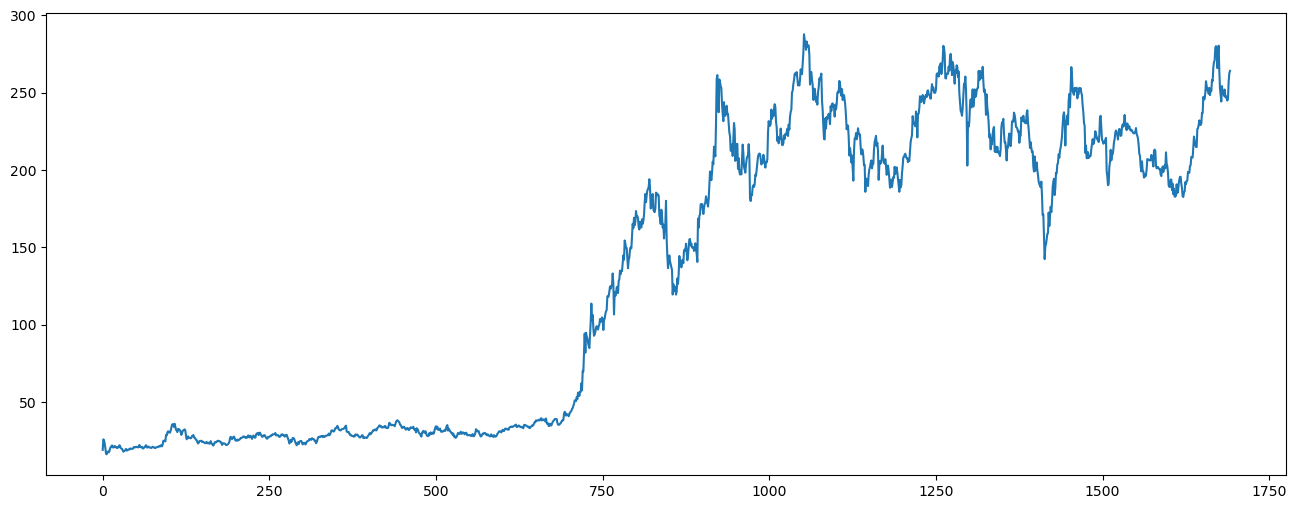

In [267]:
df['Open'].plot(figsize=(16,6))

In [268]:
X=df[['Open','High','Low','Volume']]

In [269]:
y=df['Close']

In [272]:
X.head()

,Open,High,Low,Volume
0,19.000000,25.00,17.540001,18766300
1,25.790001,30.42,23.299999,17187100
2,25.000000,25.92,20.270000,8218800
3,23.000000,23.10,18.709999,5139800
4,20.000000,20.00,15.830000,6866900


In [274]:
y.shape

(1692,)

In [277]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [279]:
X_train.head()

,Open,High,Low,Volume
820,193.960007,194.229996,188.369995,7755900
898,177.229996,182.380005,173.419998,7867400
408,32.000000,32.900002,31.430000,1277100
1399,199.399994,201.279999,191.250000,5838600
1338,211.990005,214.809998,208.800003,4151500


In [281]:
X_test.head()

,Open,High,Low,Volume
989,204.350006,206.259995,200.399994,3427400
1637,221.529999,223.800003,217.199997,3782500
1217,230.389999,232.889999,225.169998,3911900
1175,202.699997,203.339996,195.830002,7922100
1373,224.710007,228.490005,223.639999,2067000


In [283]:
X_train.shape,X_test.shape

((1353, 4), (339, 4))

In [285]:
y_train.shape,y_test.shape

((1353,), (339,))

 Train the Linear Regression Model

In [288]:
# Create the model and fit on training data
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [290]:
y_pred=model.predict(X_test)

In [292]:
y_pred

array([202.93454694, 220.120604  , 228.54135706, 198.05674902,
       226.85557941,  20.23913001, 198.51668763, 189.06654198,
       234.51648158,  20.7138233 ,  33.12226369,  31.51750351,
        20.75481222, 197.41777486,  20.47742091,  37.65557397,
        32.11531446,  29.21909694, 200.09107814, 218.53139071,
        44.84280876, 229.18949154,  35.4401324 , 275.29667996,
       212.43029517,  28.35398209, 238.99171053, 227.30972149,
        33.93722195, 249.28078058, 212.93818468,  26.54441048,
       192.66344447,  28.43180258,  28.7211644 , 147.99079545,
        27.73696897,  28.48166549,  29.52882197, 202.71127892,
        20.85961352,  28.95488478,  33.13015333, 221.70258715,
       196.39009604, 163.22575918,  30.20232823,  33.87462425,
        22.00329256, 250.1056332 ,  33.23809933, 254.18132052,
        31.25530096,  28.67311301, 194.87774091,  27.52203893,
       225.22612977, 251.36232389, 205.44454484, 126.32150395,
       246.73782626,  27.54565861, 220.24902937, 218.24

In [294]:
y_pred.shape

(339,)

In [296]:
dframe=pd.DataFrame(y_test,y_pred)

In [298]:
# Create a new DataFrame comparing actual and predicted prices
dfr = pd.DataFrame({
    'Actual Price': y_test.values,
    'Predicted Price': prediction
})


In [300]:
print(dfr)

     Actual Price  Predicted Price
0      203.990005       202.934547
1      219.740005       220.120604
2      226.050003       228.541357
3      197.330002       198.056749
4      227.070007       226.855579
..            ...              ...
334     29.950001        29.832626
335    246.720001       243.683450
336    210.240005       209.910275
337    224.779999       224.900440
338    246.229996       243.487290

[339 rows x 2 columns]


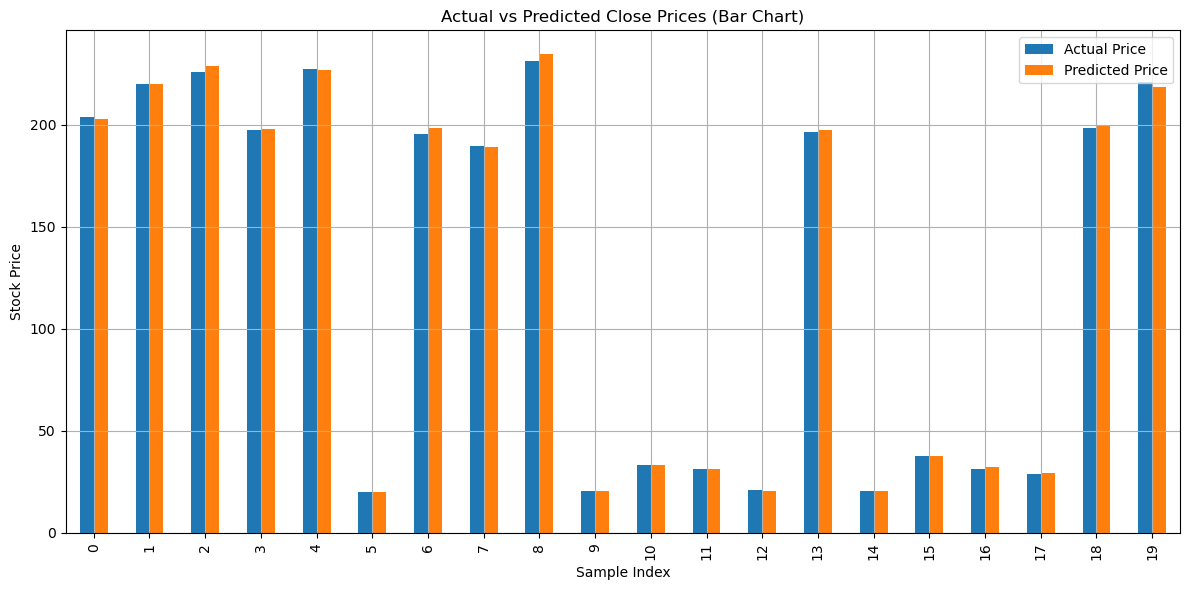

In [302]:
# Plot only first 20 rows for readability
dfr.head(20).plot(kind='bar', figsize=(12, 6))
plt.title('Actual vs Predicted Close Prices (Bar Chart)')
plt.xlabel('Sample Index')
plt.ylabel('Stock Price')
plt.grid(True)
plt.tight_layout()
plt.show()


In [303]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("R² Score:", r2)


Mean Absolute Error (MAE): 0.9281562554494881
R² Score: 0.9997850243284194


In [304]:

# Step 1: Create 10 rows of dummy input data
dummy_data = pd.DataFrame({
    'Open': np.random.uniform(800, 1000, size=10),
    'High': np.random.uniform(810, 1020, size=10),
    'Low':  np.random.uniform(780, 990, size=10),
    'Volume': np.random.randint(10_000_000, 20_000_000, size=10)
})

# Step 2: Predict Close prices using trained model
dummy_data['Predicted Close'] = model.predict(dummy_data)

# Step 3: Display the result
print(dummy_data)


         Open         High         Low    Volume  Predicted Close
0  957.853150   894.138636  945.161021  12588641       895.812711
1  992.225971   884.472331  970.384235  10312264       887.874400
2  885.495480   902.425050  808.032857  16151417       844.503925
3  959.171531  1013.780536  849.302551  17142688       926.479422
4  830.546583   962.790269  867.086746  10120527       963.127295
5  863.867620   994.347033  826.905204  12909387       943.973147
6  953.465885   978.810046  841.641252  15226139       895.548784
7  830.795917   854.965329  806.807565  10837206       832.998603
8  961.338927   877.571637  814.570283  15680847       789.918020
9  817.398128   816.736484  893.287338  15268468       868.297017
